In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mall customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID', axis='columns', inplace=True)

In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
df.rename(columns={'Spending Score (1-100)' : 'score' , 'Annual Income (k$)':'income'}, inplace=True)

In [7]:
df.head()

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df.corr()

,Age,income,score
Age,1.000000,-0.012398,-0.327227
income,-0.012398,1.000000,0.009903
score,-0.327227,0.009903,1.000000


<AxesSubplot:>

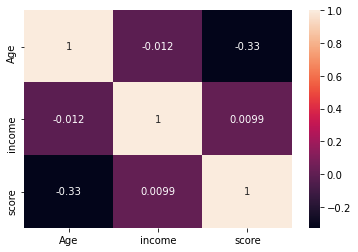

In [9]:
sns.heatmap(df.corr() , annot=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lab = LabelEncoder()
df['Gender'] = lab.fit_transform(df['Gender'])

In [12]:
df.head()

,Gender,Age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


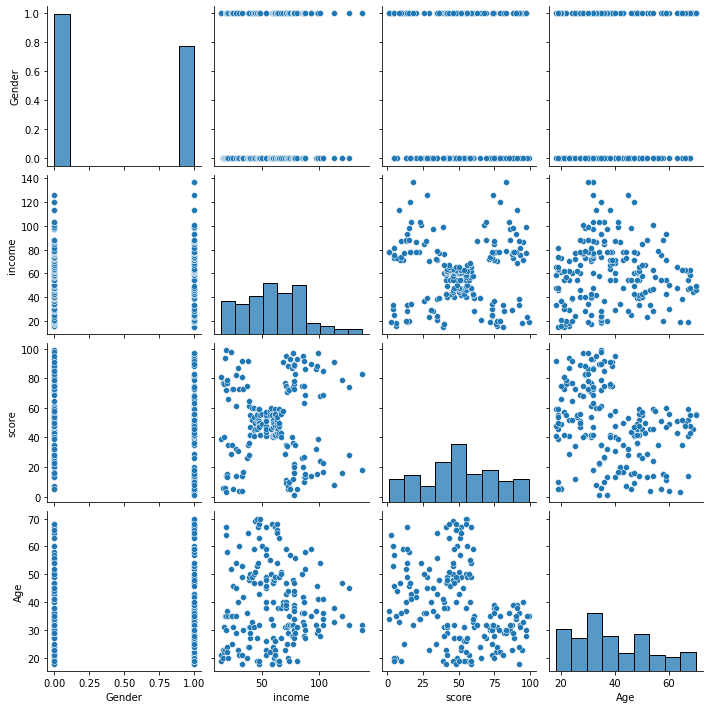

In [13]:
sns.pairplot(df[['Gender','income', 'score', 'Age']])

In [14]:
import sklearn.cluster as cls

In [15]:
kmns = cls.KMeans()

In [16]:
kmns.fit(df[['income', 'score', 'Gender', 'Age' ]])

KMeans()

In [17]:
kmns.cluster_centers_

array([[ 80.375     ,  82.9375    ,   0.46875   ,  32.625     ],
       [ 53.37777778,  49.08888889,   0.44444444,  56.15555556],
       [109.7       ,  22.        ,   0.3       ,  41.        ],
       [ 25.72727273,  79.36363636,   0.40909091,  25.27272727],
       [ 56.65789474,  49.13157895,   0.34210526,  27.        ],
       [ 25.14285714,  19.52380952,   0.38095238,  44.14285714],
       [ 79.64      ,  15.4       ,   0.68      ,  41.96      ],
       [114.71428571,  78.42857143,   0.42857143,  33.        ]])

In [18]:
df['New_Cluster'] = kmns.predict(df[['income', 'score', 'Gender', 'Age']])

In [19]:
df0  = df[df['New_Cluster'] == 0]
df1  = df[df['New_Cluster'] == 1]
df2  = df[df['New_Cluster'] == 2]
df3  = df[df['New_Cluster'] == 3]
df4  = df[df['New_Cluster'] == 4]
df5  = df[df['New_Cluster'] == 5]
df6  = df[df['New_Cluster'] == 6]
df7  = df[df['New_Cluster'] == 7]

In [20]:
df.head()

,Gender,Age,income,score,New_Cluster
0,1,19,15,39,5
1,1,21,15,81,3
2,0,20,16,6,5
3,0,23,16,77,3
4,0,31,17,40,5


In [21]:
data = pd.DataFrame([df0.shape,df1.shape,df2.shape,df3.shape,df4.shape, df5.shape, df6.shape, df7.shape])
data

,0,1
0,32,5
1,45,5
2,10,5
3,22,5
4,38,5
5,21,5
6,25,5
7,7,5


In [22]:
center1 = kmns.cluster_centers_

In [23]:
center1

array([[ 80.375     ,  82.9375    ,   0.46875   ,  32.625     ],
       [ 53.37777778,  49.08888889,   0.44444444,  56.15555556],
       [109.7       ,  22.        ,   0.3       ,  41.        ],
       [ 25.72727273,  79.36363636,   0.40909091,  25.27272727],
       [ 56.65789474,  49.13157895,   0.34210526,  27.        ],
       [ 25.14285714,  19.52380952,   0.38095238,  44.14285714],
       [ 79.64      ,  15.4       ,   0.68      ,  41.96      ],
       [114.71428571,  78.42857143,   0.42857143,  33.        ]])

# Select Optimal Number Of Clusters

In [24]:
from sklearn.cluster import KMeans
wcs = []
num = range(1,20)
for k in num:
    kmns2 = KMeans(n_clusters=k) 
    kmns2.fit(df[['income', 'score', 'Gender', 'Age']])
    wcs.append(kmns2.inertia_) 

C:\Users\Raju\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
wcs

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75399.61541401486,
 58348.64136331505,
 51165.18423710792,
 44359.6346411483,
 40663.6731564088,
 37402.42600066601,
 34231.02458837459,
 32353.340117219734,
 29539.757275132262,
 28458.721092763437,
 26827.089879564886,
 24384.8647648533,
 23728.621175393226,
 22400.40645654654,
 21274.787057387064]

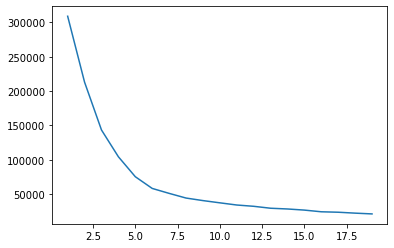

In [26]:
plt.plot(num, wcs)

In [27]:
!pip install kneed

In [28]:
from kneed import KneeLocator
kn = KneeLocator(num, wcs, curve='convex', direction = 'decreasing')

In [29]:
kn.knee

6

In [30]:
print('Our optimal number of clusters =', kn.knee)

Our optimal number of clusters = 6


# After Tuning

In [31]:
df.head()

,Gender,Age,income,score,New_Cluster
0,1,19,15,39,5
1,1,21,15,81,3
2,0,20,16,6,5
3,0,23,16,77,3
4,0,31,17,40,5


In [32]:
import sklearn.cluster as cls

In [33]:
kmns3 = cls.KMeans(n_clusters=kn.knee)

In [34]:
kmns3.fit(df[['income', 'score', 'Gender', 'Age' ]])

KMeans(n_clusters=6)

In [35]:
df['New_Cluster_02'] = kmns3.predict(df[['income', 'score', 'Gender', 'Age']])

In [36]:
df.head()

,Gender,Age,income,score,New_Cluster,New_Cluster_02
0,1,19,15,39,5,5
1,1,21,15,81,3,0
2,0,20,16,6,5,5
3,0,23,16,77,3,0
4,0,31,17,40,5,5


In [37]:
center2 = kmns3.cluster_centers_

In [38]:
center2

array([[25.72727273, 79.36363636,  0.40909091, 25.27272727],
       [86.53846154, 82.12820513,  0.46153846, 32.69230769],
       [53.37777778, 49.08888889,  0.44444444, 56.15555556],
       [56.65789474, 49.13157895,  0.34210526, 27.        ],
       [88.22857143, 17.28571429,  0.57142857, 41.68571429],
       [25.14285714, 19.52380952,  0.38095238, 44.14285714]])